In [ ]:
# 📦 Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score

sns.set(style="whitegrid")

# 🧠 Mini-Projet : Analyse de données (Students Performance)

## 📥 Chargement des données

In [ ]:
# Chargement du fichier Excel
df = pd.read_excel("aStudentsPerformance_500_final.xlsx")
df.head()


NameError: name 'pd' is not defined

## 🔍 Analyse exploratoire

In [ ]:
# Statistiques descriptives
df.describe()


,math score,reading score,writing score,studyhours,absence days
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,70.800000,78.400000,74.800000,9.908000,5.126000
std,13.919321,13.498311,17.074633,6.171524,3.108931
min,47.000000,57.000000,44.000000,0.000000,0.000000
25%,69.000000,72.000000,74.000000,4.000000,2.000000
50%,72.000000,78.000000,75.000000,10.000000,5.000000
75%,76.000000,90.000000,88.000000,15.000000,8.000000
max,90.000000,95.000000,93.000000,20.000000,10.000000


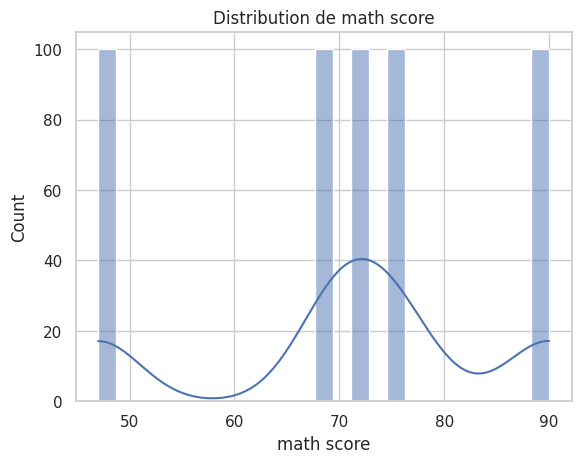

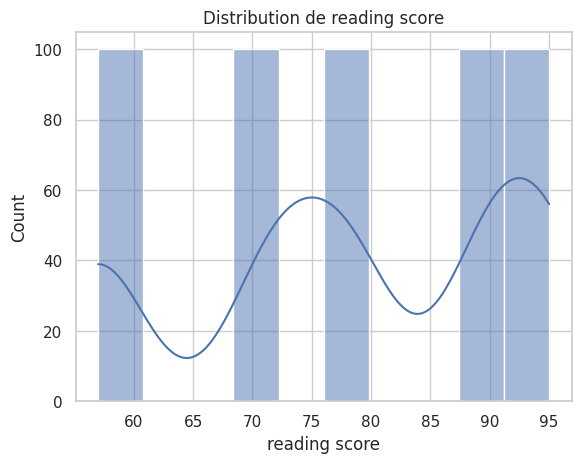

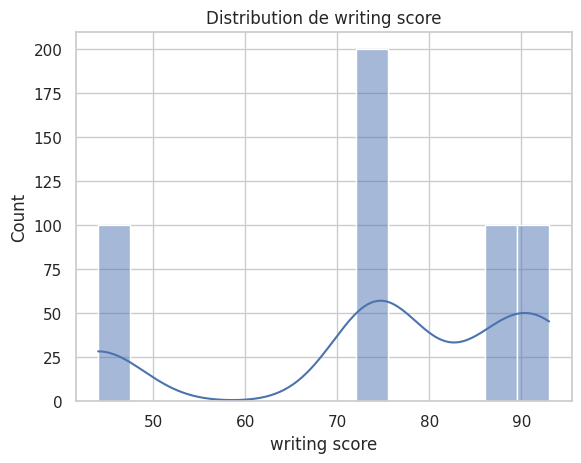

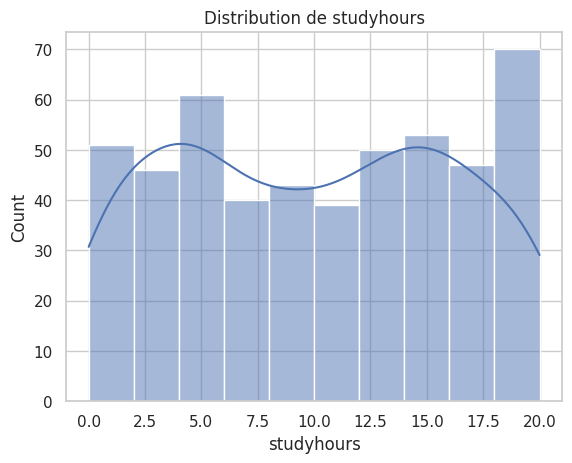

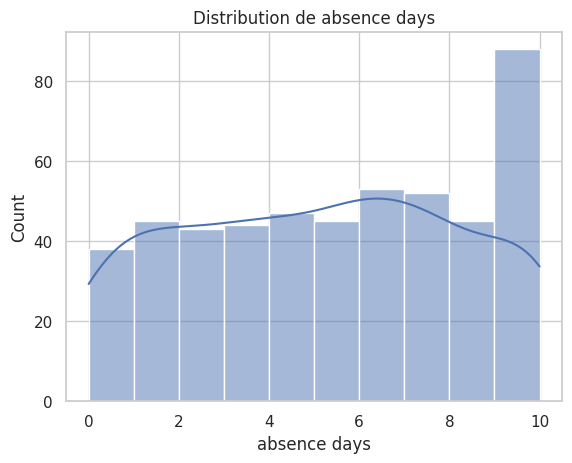

In [ ]:
# Visualisation des distributions
numeric_cols = ["math score", "reading score", "writing score", "studyhours", "absence days"]
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


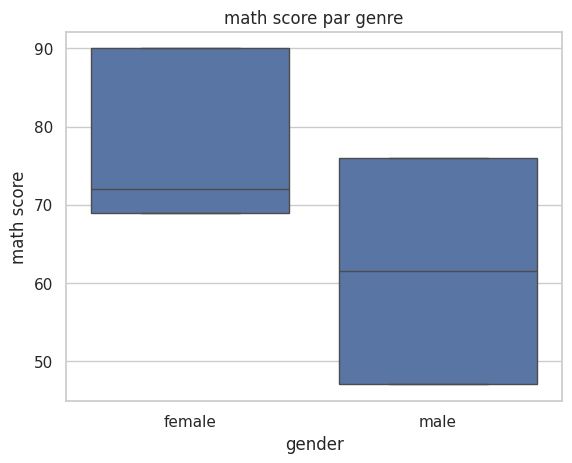

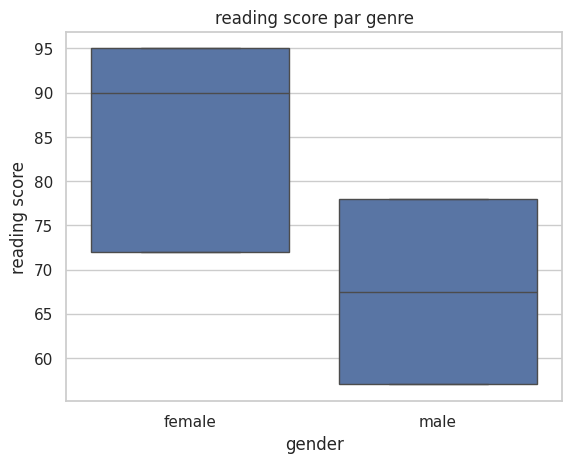

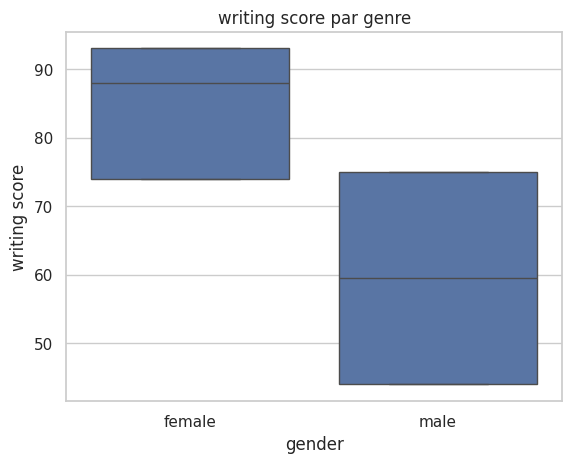

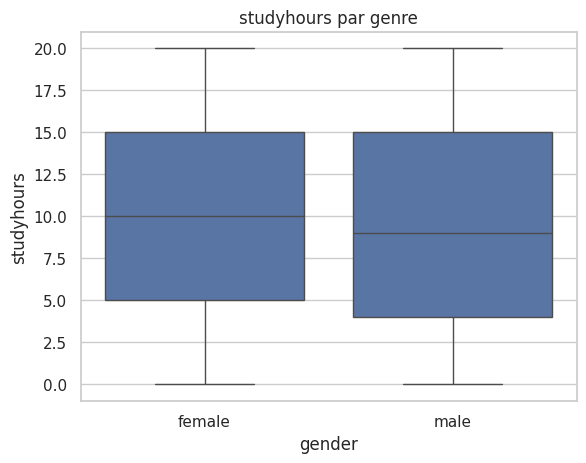

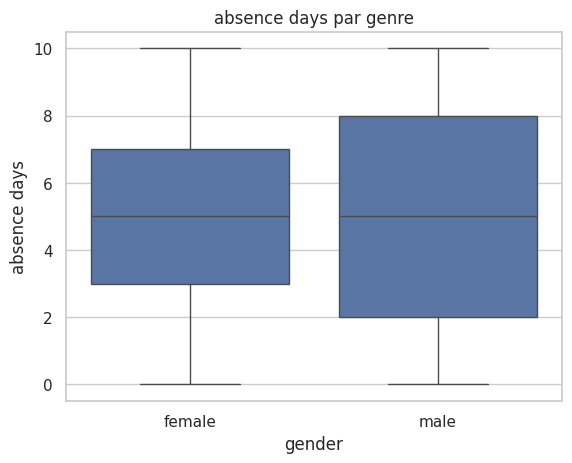

In [ ]:
# Analyse bivariée selon le genre
for col in numeric_cols:
    sns.boxplot(data=df, x="gender", y=col)
    plt.title(f"{col} par genre")
    plt.show()


Moyenne des variables par catégorie (analyse bivariée)

In [ ]:

# Moyenne des scores par genre
df.groupby('gender')[['math score', 'reading score', 'writing score', 'studyhours', 'absence days']].mean()


,math score,reading score,writing score,studyhours,absence days
gender,,,,,
female,77.0,85.666667,85.0,10.106667,5.120
male,61.5,67.500000,59.5,9.610000,5.135


Matrice de corrélation et heatmap

               math score  reading score  writing score  studyhours  \
math score       1.000000       0.850508       0.892779    0.029646   
reading score    0.850508       1.000000       0.973316    0.001405   
writing score    0.892779       0.973316       1.000000    0.008725   
studyhours       0.029646       0.001405       0.008725    1.000000   
absence days    -0.031555      -0.024985      -0.020741    0.060662   

               absence days  
math score        -0.031555  
reading score     -0.024985  
writing score     -0.020741  
studyhours         0.060662  
absence days       1.000000  


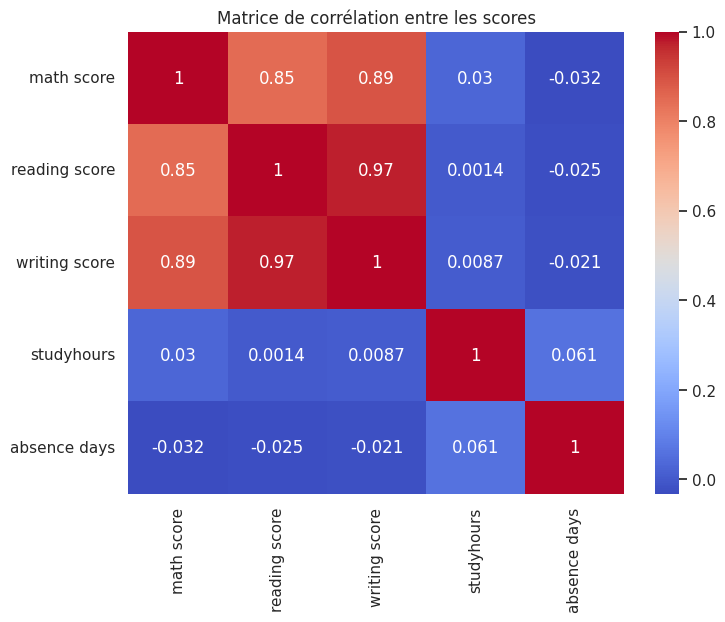

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
corr_matrix = df[['math score', 'reading score', 'writing score', 'studyhours', 'absence days']].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les scores')
plt.show()


## 📊 Analyse en Composantes Principales (ACP)

Variance expliquée : [0.56267482 0.21213075 0.18773099 0.03302913 0.00443431]


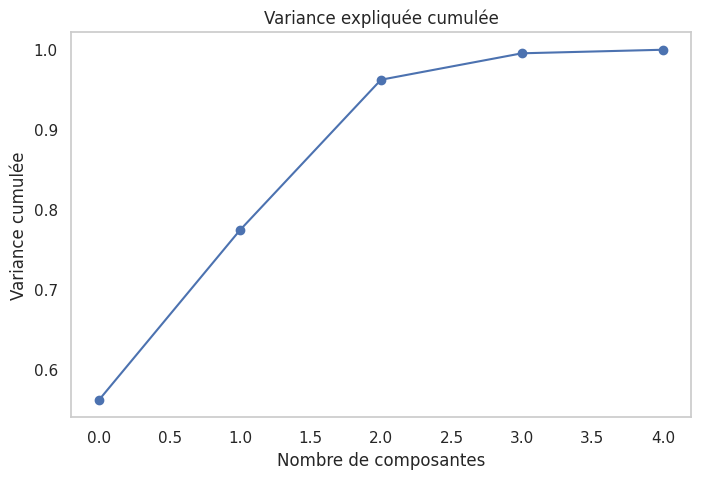

Valeurs propres : [2.81901212 1.06277931 0.94053602 0.16547662 0.02221597]


In [ ]:
# Normalisation
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
explained = pca.explained_variance_ratio_
print("Variance expliquée :", explained)

# Projection
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained), marker='o')
plt.title("Variance expliquée cumulée")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.grid()
plt.show()
# Critère de Kaiser : on garde les composantes avec valeur propre > 1 :
print("Valeurs propres :", pca.explained_variance_)


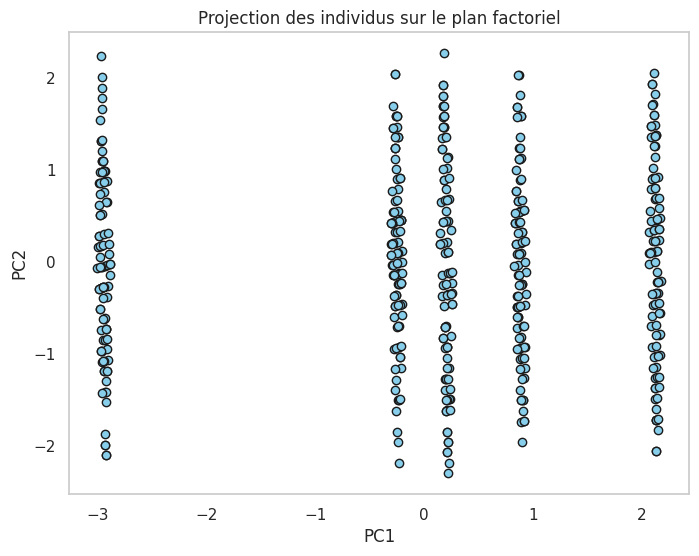

In [ ]:
# Projection sur les deux premiers axes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c='skyblue', edgecolor='k')
plt.title("Projection des individus sur le plan factoriel")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()


 Biplot : projection individus + variables

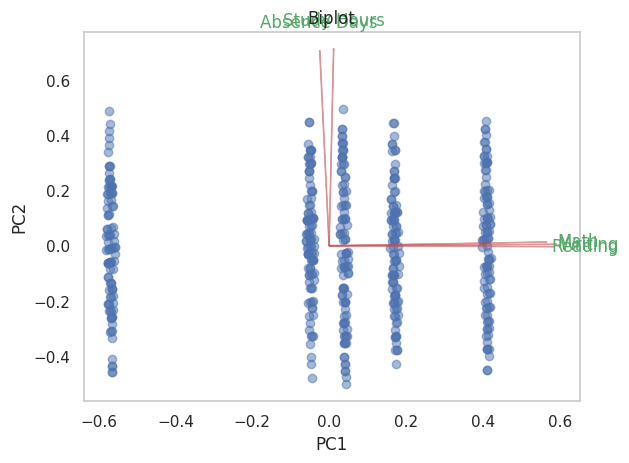

In [ ]:
import matplotlib.pyplot as plt

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title("Biplot")
    plt.show()

biplot(X_pca, np.transpose(pca.components_), labels=['Math', 'Reading', 'Writing', 'Study Hours', 'Absence Days'])


Contributions et qualité de représentation (cos²)

In [ ]:
# Contributions des variables
print("Contributions des variables sur PC1 :", pca.components_[0])
print("Contributions des variables sur PC2 :", pca.components_[1])

# Qualité de représentation (cos²) des individus
cos2 = X_pca**2 / np.sum(X_pca**2, axis=1)[:, np.newaxis]
cos2_df = pd.DataFrame(cos2, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
cos2_df.head()


Contributions des variables sur PC1 : [ 0.56245719  0.58006897  0.58859482  0.01166991 -0.02412158]
Contributions des variables sur PC2 : [ 0.01326684 -0.00322457  0.0052363   0.71065346  0.70339024]


,PC1,PC2,PC3,PC4,PC5
0,0.083347,0.643470,0.039326,0.150563,0.083294
1,0.286355,0.470423,0.018609,0.223139,0.001474
2,0.797478,0.150345,0.039404,0.007462,0.005311
3,0.817836,0.007432,0.172943,0.000286,0.001503
4,0.043256,0.849479,0.001895,0.104808,0.000561


## 🎯 Analyse des variables qualitatives avec ACM (via ACP sur tableau disjonctif)

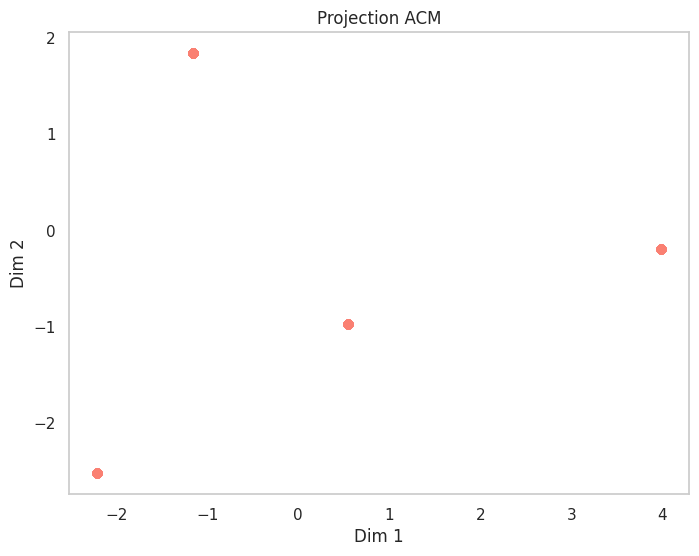

In [ ]:
# Encodage des variables qualitatives
qual_cols = ["gender", "race/ethnicity", "lunch", "test preparation course"]
df_qual = pd.get_dummies(df[qual_cols])

# ACP sur tableau disjonctif
X_acm = StandardScaler().fit_transform(df_qual)
pca_acm = PCA(n_components=2)
X_acm_2d = pca_acm.fit_transform(X_acm)

plt.figure(figsize=(8,6))
plt.scatter(X_acm_2d[:, 0], X_acm_2d[:, 1], c='salmon')
plt.title("Projection ACM")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid()
plt.show()


## 🌲 Classification Ascendante Hiérarchique (CAH)

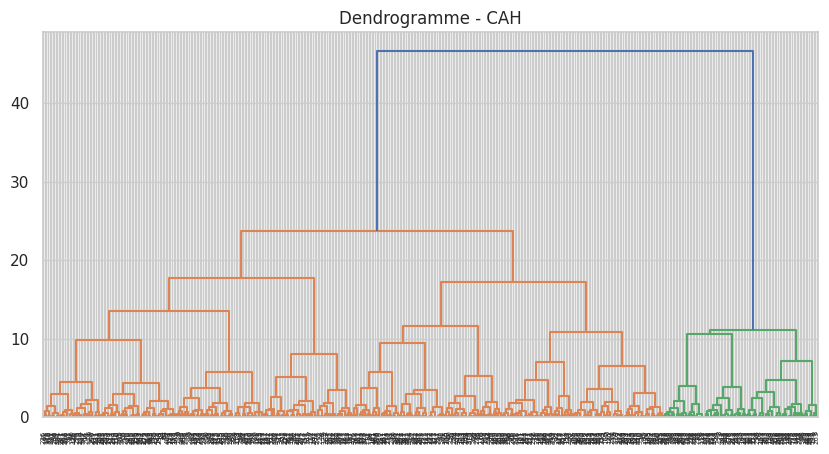

In [ ]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogramme - CAH")
plt.show()

# Choix de 3 classes par exemple
labels_cah = fcluster(linked, 3, criterion='maxclust')
df["cluster_cah"] = labels_cah


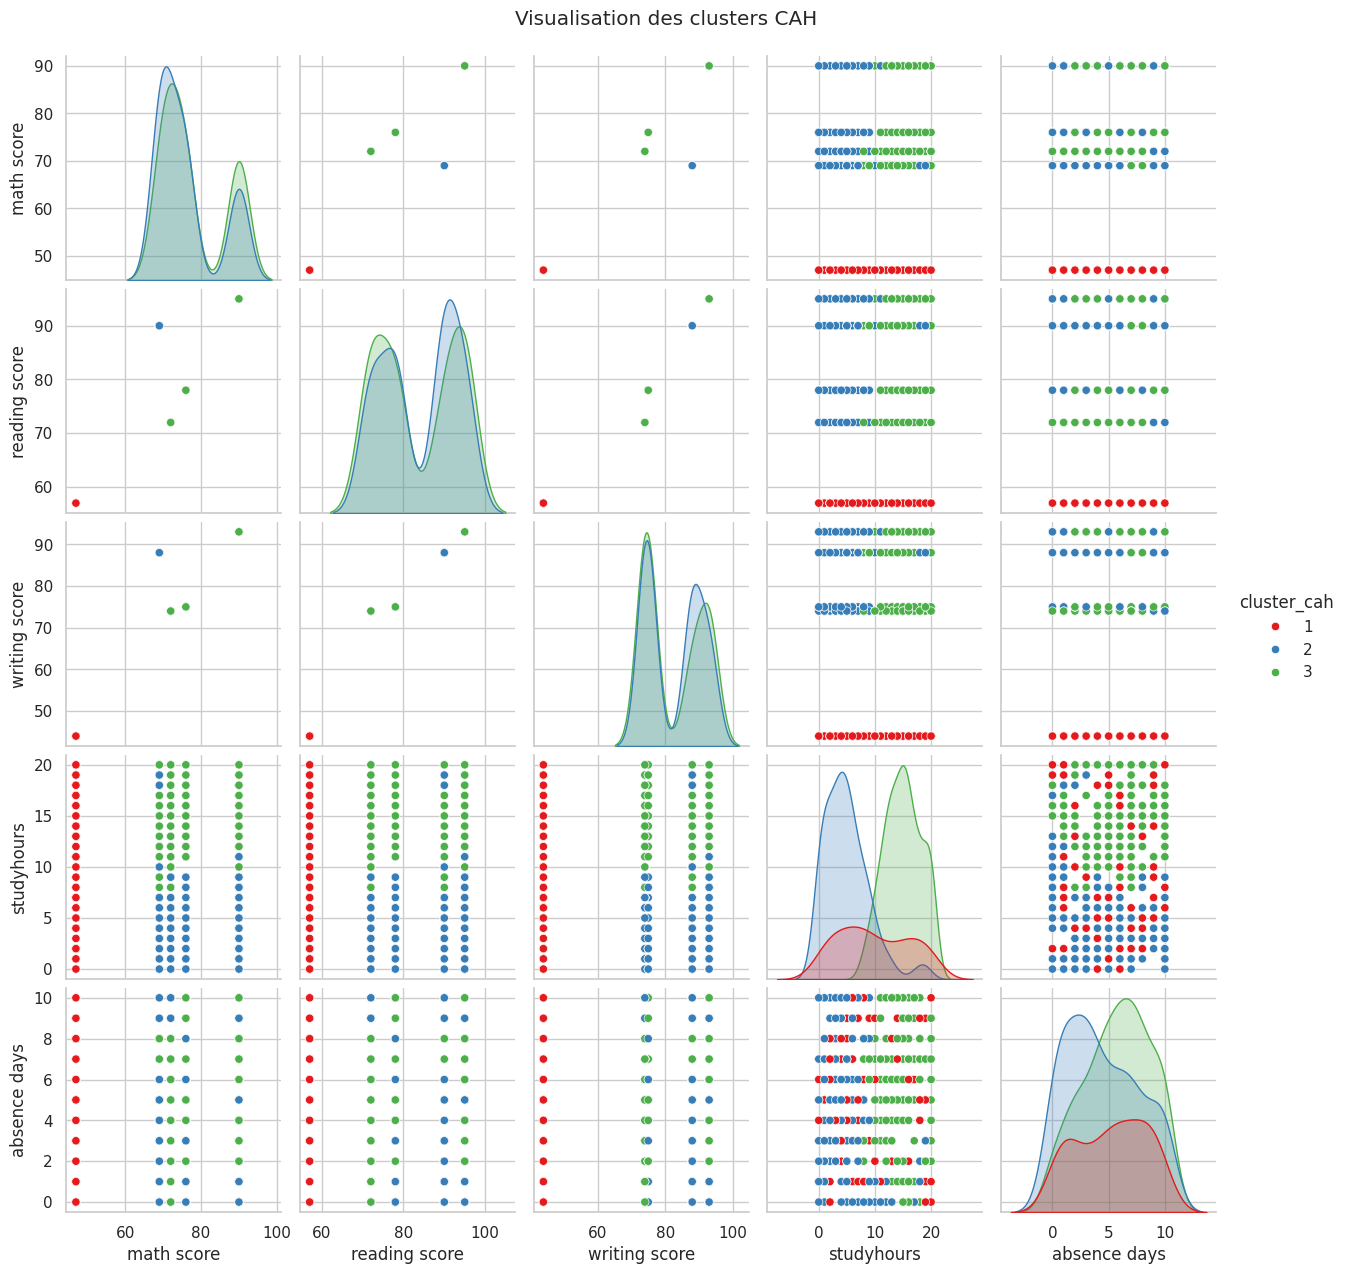

In [ ]:
sns.pairplot(df, vars=numeric_cols, hue="cluster_cah", palette="Set1")
plt.suptitle("Visualisation des clusters CAH", y=1.02)
plt.show()


## 📌 K-Means et comparaison

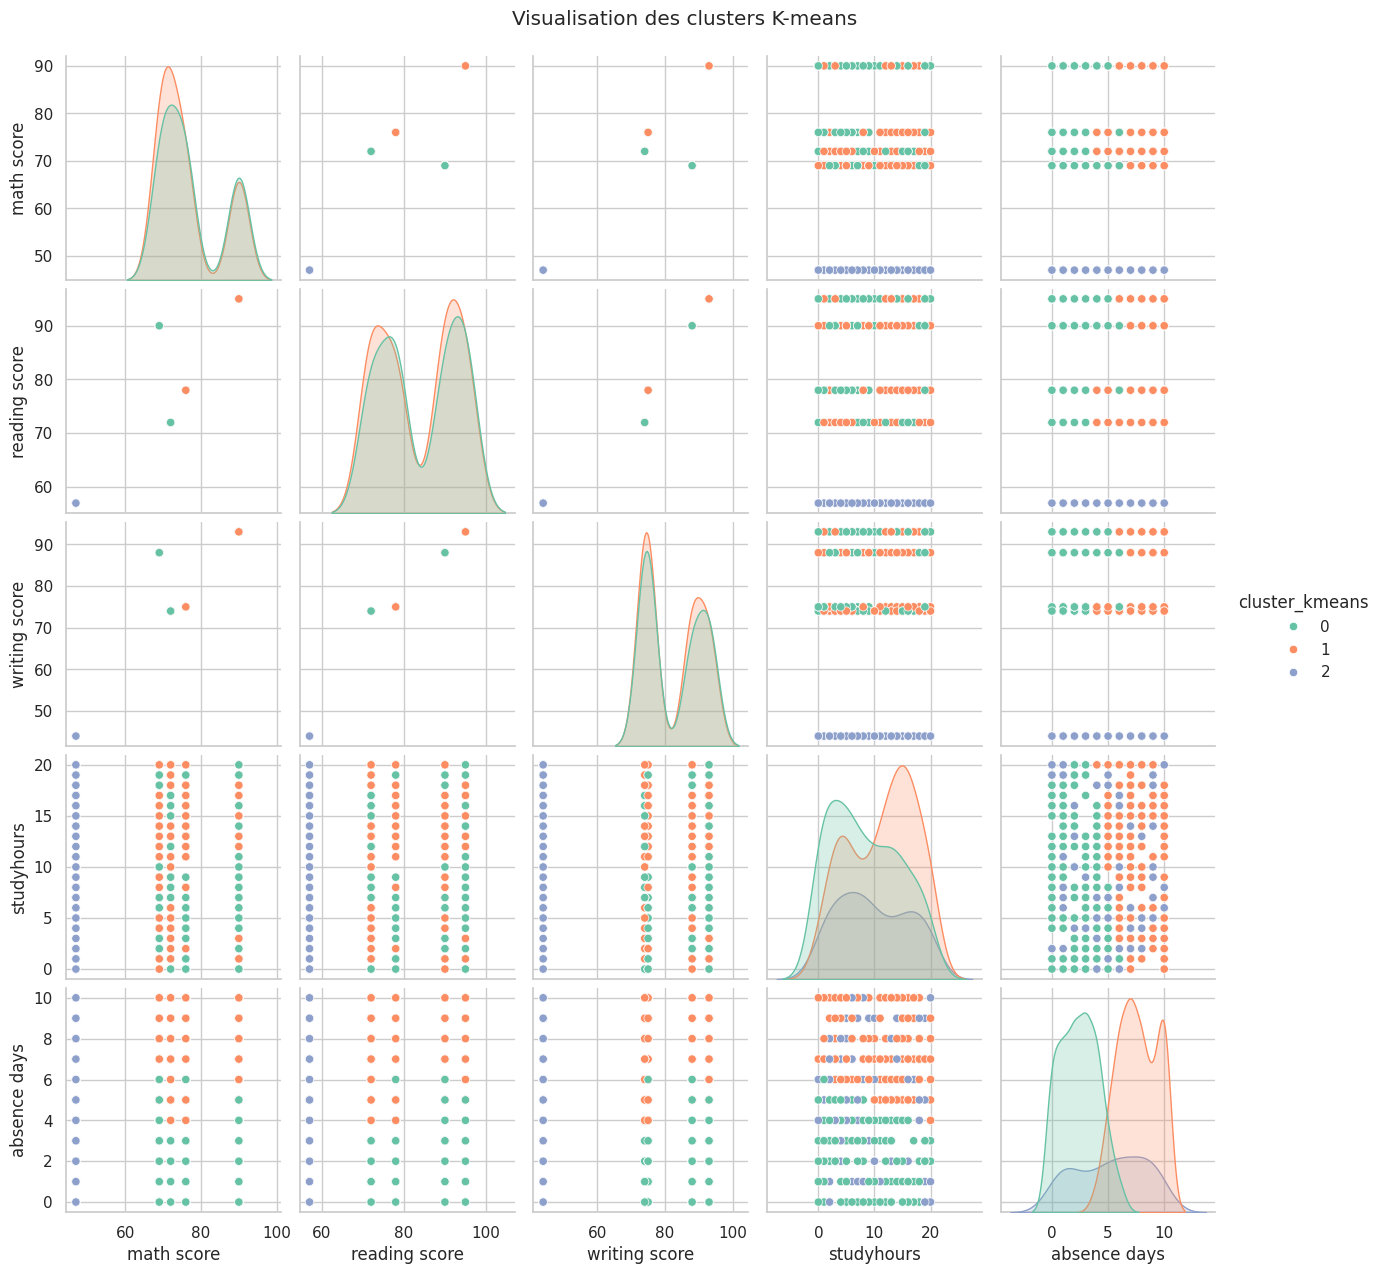

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, vars=numeric_cols, hue="cluster_kmeans", palette="Set2")
plt.suptitle("Visualisation des clusters K-means", y=1.02)
plt.show()


In [ ]:
# Comparaison des partitions (bonus)
ari = adjusted_rand_score(df["cluster_cah"], df["cluster_kmeans"])
print(f"Taux d'accord (Rand Index) entre CAH et K-means : {ari:.2f}")


Taux d'accord (Rand Index) entre CAH et K-means : 0.38
